#Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install hurst
from hurst import compute_Hc
from google.colab import drive

#Mounting Google Drive

In [2]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/dsocs'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading Datasets

In [3]:
def load_datasets(path):
  df1 = pd.read_csv(path+"/dataset_1.csv", header = None)
  df2 = pd.read_csv(path+"/dataset_2.csv", header = None)
  df3 = pd.read_csv(path+"/dataset_3.csv", header = None)
  return df1, df2, df3

In [5]:
df1, df2, df3 = load_datasets(path)

In [6]:
df1

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,-0.159352,-0.518151,-0.718868,0.629355,-0.515754,-0.768873,-0.358917,0.006380,-0.688388,0.093883,...,-1.488275,0.083477,0.649488,-0.260984,-0.615281,-1.128461,-0.355863,0.253437,-1.433691,-0.180602
1,1.131479,-0.086737,-1.804779,0.882635,-0.174352,0.627651,0.160902,1.332706,1.971553,-0.670201,...,-1.638810,-0.289671,-0.350143,1.688196,-0.569183,-0.909974,0.313684,-0.140157,0.352988,0.349827
2,-0.670378,-1.309325,0.128571,0.015227,0.449655,1.011486,-0.366536,0.736388,1.022802,0.092168,...,0.920568,1.460745,0.726209,0.418037,-0.644110,-0.141509,-0.058360,0.282819,1.036063,0.246670
3,0.515464,1.749060,1.096161,0.980643,-0.169744,1.177617,1.533098,2.029569,-0.520563,1.304905,...,0.958229,1.685419,0.628904,2.805703,0.132402,0.894142,0.974151,1.428374,0.065129,1.844927
4,1.747498,0.108609,2.132218,0.687284,0.032406,-0.316236,0.136525,-0.168822,-0.208166,-1.462764,...,-0.683049,0.316324,-0.231111,0.061789,-0.721303,-1.486565,-1.003557,0.247951,0.412506,-2.153814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.466661,1.336383,0.268677,-1.085924,-1.182070,-0.145305,-0.631810,-0.896406,0.002647,0.030547,...,-1.088336,0.023687,0.171525,-1.592571,0.736542,-1.339938,0.580086,0.287275,-0.648097,-0.271440
1996,0.331813,0.985752,0.350104,-0.488596,-0.215772,0.020324,0.517940,0.314294,-0.760696,-1.675934,...,-0.539901,-0.684012,-0.104726,0.387838,-0.299907,-0.325980,-0.642815,0.063494,1.737983,-0.269306
1997,1.047981,-0.866140,0.681753,-1.023950,0.259212,1.064974,1.776660,-0.067583,0.286955,-0.656050,...,-0.634362,-0.981232,-0.280921,0.009325,-2.793422,2.720108,1.040524,-1.144319,-0.118792,0.810641
1998,-1.384749,-1.240435,-1.288934,-1.936414,0.013336,-1.173266,-1.172485,-2.118099,-1.086636,-1.302760,...,0.499750,-0.805129,-0.484825,-0.329410,0.277461,0.295262,-1.493186,0.391094,-0.513036,-0.684941


In [7]:
df2

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,0.006269,-0.008350,-0.025534,-0.007875,0.006046,0.000000,0.019935,-0.007324,0.002758,-0.007435,...,0.010929,0.000000,-0.008969,0.000000,-0.008392,-0.021739,0.011364,-0.006690,0.000000,-0.005988
1,0.006230,-0.004202,-0.008658,-0.024001,-0.012121,0.004843,0.004376,-0.014816,0.000000,0.000000,...,-0.005449,-0.003515,-0.009050,-0.016806,-0.014144,0.000000,-0.005665,-0.020340,-0.008032,0.000000
2,-0.006230,0.012553,0.002895,0.012073,0.024097,0.014389,-0.015402,0.014816,-0.002758,0.007435,...,-0.005480,-0.014184,-0.046519,0.016806,0.008511,0.021739,0.000000,0.013606,0.008032,-0.006024
3,0.012422,0.006218,0.011494,0.015874,0.005931,0.004750,0.002214,0.007324,-0.002768,0.007380,...,-0.005509,-0.025318,0.018868,-0.016806,-0.008511,0.021278,-0.005699,0.006734,0.003992,-0.003025
4,-0.006192,0.016394,0.011364,0.007843,0.017600,-0.004750,0.021883,0.000000,-0.016759,-0.003682,...,0.005509,-0.011050,0.018519,-0.008510,0.002844,0.020835,0.000000,0.000000,0.003976,0.006042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.006969,-0.012121,0.006191,-0.003824,0.003293,-0.032203,0.007380,-0.004184,0.000000,-0.014707,...,0.000000,-0.018065,-0.003898,0.004750,-0.003552,0.004963,-0.012739,-0.006873,0.000000,0.000000
1996,0.013889,0.018128,-0.025001,-0.003839,-0.009917,0.003630,0.010969,0.014568,-0.003189,-0.018692,...,-0.014306,-0.007843,0.000000,-0.014320,-0.003565,-0.004963,0.019048,-0.006920,-0.014670,0.000000
1997,0.000000,-0.018128,0.037272,0.015267,-0.037229,0.000000,0.018019,0.000000,-0.003200,0.007519,...,0.002878,0.005235,0.007782,-0.004820,-0.007169,0.000000,-0.012658,-0.006968,0.004914,0.000000
1998,-0.004987,0.003044,0.018128,0.000000,0.017095,0.010811,0.007117,-0.002068,-0.006431,-0.011299,...,-0.005763,-0.007864,0.000000,0.009616,0.007169,0.009901,0.006349,0.006968,-0.004914,0.000000


In [8]:
df3

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,0.012623,0.025374,0.002063,0.004125,0.012519,-0.000835,-0.023047,0.027302,-0.005820,0.011234,...,-0.006466,0.007332,0.017451,-0.015665,-0.011325,-0.020384,-0.004954,-0.022536,0.015836,-0.001662
1,0.003298,0.014536,-0.029641,0.012567,-0.012428,-0.000903,0.023975,0.004036,0.007658,0.006838,...,0.014240,-0.019786,-0.007748,0.011028,-0.002215,0.014018,-0.024174,0.003179,0.004294,-0.006896
2,0.006456,-0.050806,0.038056,-0.002303,-0.046851,-0.009906,0.001019,0.030454,-0.049382,0.019071,...,-0.008937,0.005997,0.004753,-0.002264,-0.000669,0.001633,-0.000368,0.021914,-0.015042,0.005678
3,-0.028149,-0.000453,-0.004619,-0.002292,0.016777,0.008902,0.003025,0.014351,-0.000021,-0.004086,...,0.005836,-0.002064,0.024570,0.000870,-0.002693,-0.014929,-0.041228,0.002439,0.002759,-0.024235
4,-0.018291,0.016290,-0.015851,0.001452,-0.001339,-0.012853,-0.032268,-0.008318,0.009618,0.004227,...,0.015666,-0.028862,-0.015802,-0.001429,-0.002433,-0.002125,-0.078169,0.014743,0.014304,0.004755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.015837,-0.015034,0.023694,0.014059,-0.004968,-0.013273,-0.016673,0.040883,-0.004742,0.015254,...,0.005649,0.011528,-0.011247,0.002574,0.009690,-0.031633,0.049019,-0.006084,0.005583,0.011711
1996,-0.005370,-0.015404,-0.011230,-0.000625,-0.037420,-0.032599,0.001059,0.019074,0.008923,-0.000805,...,-0.003246,-0.006304,0.035143,-0.001836,-0.020748,-0.002537,0.011777,0.003264,0.006709,0.021329
1997,-0.045664,0.016440,0.049119,0.004249,-0.022313,-0.018484,0.008138,-0.011307,0.001492,-0.019357,...,-0.028888,-0.019808,-0.020766,0.009402,-0.003083,-0.011565,-0.012533,-0.006202,-0.001659,0.013756
1998,-0.012974,0.005475,0.009641,-0.013844,-0.048655,-0.006157,-0.022682,0.002253,0.021066,0.028354,...,0.007912,-0.010209,-0.013501,0.009268,0.010196,-0.006639,-0.012702,0.009683,0.002781,-0.013004


#Probability distribution of values

[-1.07823272  0.04981646 -0.49100464 ...  1.03831595  0.14039506
  0.05496703]


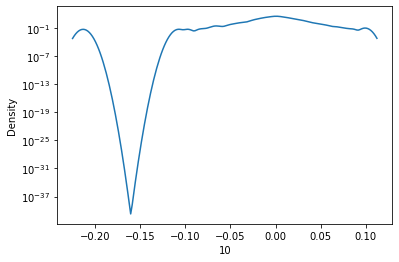

In [37]:
sns.kdeplot(df2[10])
#gaussian_series = np.random.normal( loc = np.mean(df2[10]), scale = np.std(df1[10]) , size = 10**5 )
#print(gaussian_series)
#sns.kdeplot(gaussian_series, ax=ax, Label='Gaussian')
#plt.show()


In [8]:
def plot_probability_distribution(time_series):
  sns.kdeplot(time_series, legend=True)

Text(0.5, 0, 'Log returns of Asset Prices')

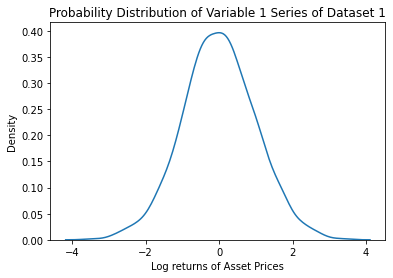

In [108]:
plot_probability_distribution(df1[0])
plt.title("Probability Distribution of Variable 1 Series of Dataset 1")
plt.xlabel("Log returns of Asset Prices")
#plt.ylabel("Count")

Text(0.5, 0, 'Log returns of Asset Prices')

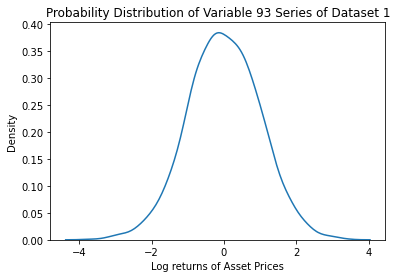

In [109]:
plot_probability_distribution(df1[92])
plt.title("Probability Distribution of Variable 93 Series of Dataset 1")
plt.xlabel("Log returns of Asset Prices")

Text(0.5, 0, 'Log returns of Asset Prices')

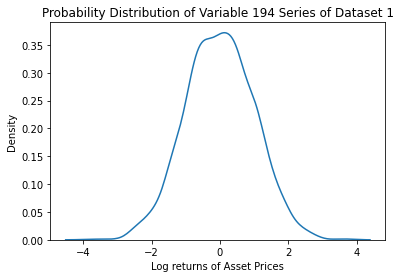

In [13]:
plot_probability_distribution(df1[193])
plt.title("Probability Distribution of Variable 194 Series of Dataset 1")
plt.xlabel("Log returns of Asset Prices")

Text(0.5, 0, 'Log returns of Asset Prices')

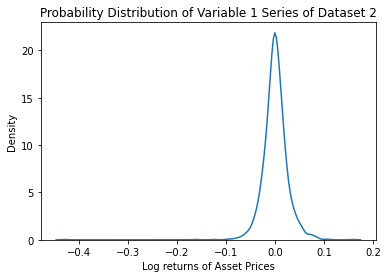

In [9]:
plot_probability_distribution(df2[0])
plt.title("Probability Distribution of Variable 1 Series of Dataset 2")
plt.xlabel("Log returns of Asset Prices")

Text(0.5, 0, 'Log returns of Asset Prices')

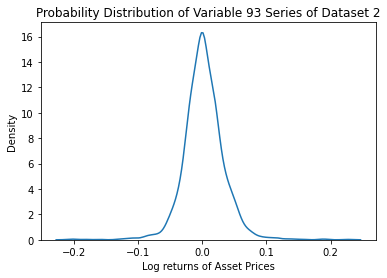

In [10]:
plot_probability_distribution(df2[92])
plt.title("Probability Distribution of Variable 93 Series of Dataset 2")
plt.xlabel("Log returns of Asset Prices")

Text(0.5, 0, 'Log returns of Asset Prices')

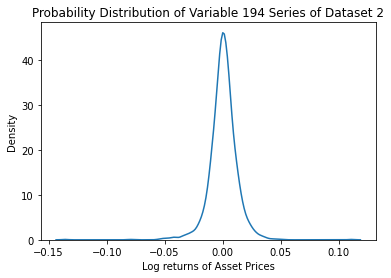

In [14]:
plot_probability_distribution(df2[193])
plt.title("Probability Distribution of Variable 194 Series of Dataset 2")
plt.xlabel("Log returns of Asset Prices")

Text(0.5, 0, 'Log returns of Asset Prices')

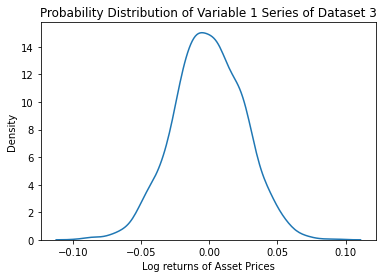

In [11]:
plot_probability_distribution(df3[0])
plt.title("Probability Distribution of Variable 1 Series of Dataset 3")
plt.xlabel("Log returns of Asset Prices")

Text(0.5, 0, 'Log returns of Asset Prices')

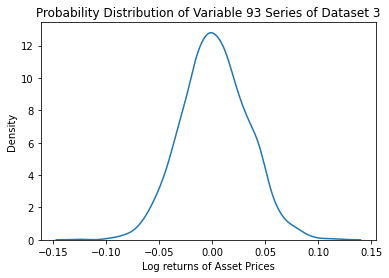

In [12]:
plot_probability_distribution(df3[92])
plt.title("Probability Distribution of Variable 93 Series of Dataset 3")
plt.xlabel("Log returns of Asset Prices")

Text(0.5, 0, 'Log returns of Asset Prices')

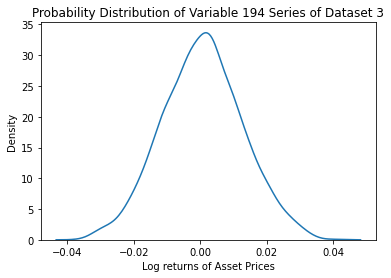

In [15]:
plot_probability_distribution(df3[193])
plt.title("Probability Distribution of Variable 194 Series of Dataset 3")
plt.xlabel("Log returns of Asset Prices")

#Calculating Hurst Exponent

In [58]:
df1[0]

0      -0.159352
1       1.131479
2      -0.670378
3       0.515464
4       1.747498
          ...   
1995    0.466661
1996    0.331813
1997    1.047981
1998   -1.384749
1999   -0.878755
Name: 0, Length: 2000, dtype: float64

In [78]:
hc_1_0, _, _ = compute_Hc(df1[0], kind = 'change',simplified = True)
print("Hurst Component of 1st variable in Dataset 1: ", hc_1_0)
hc_1_92, _, _ = compute_Hc(df1[92], kind = 'change',simplified = True)
print("Hurst Component of 93rd variable in Dataset 1: ", hc_1_92)
hc_1_193, _, _ = compute_Hc(df1[193], kind = 'change', simplified = True)
print("Hurst Component of 194th variable in Dataset 1: ", hc_1_193)

Hurst Component of 1st variable in Dataset 1:  0.5840960780126716
Hurst Component of 93rd variable in Dataset 1:  0.5139900098428936
Hurst Component of 194th variable in Dataset 1:  0.4717164739908118


In [79]:
hc_2_0, _, _ = compute_Hc(df2[0], kind = 'change', simplified = True)
print("Hurst Component of 1st variable in Dataset 2: ", hc_2_0)
hc_2_92, _, _ = compute_Hc(df2[92], kind = 'change', simplified = True)
print("Hurst Component of 93rd variable in Dataset 2: ", hc_2_92)
hc_2_193, _, _ = compute_Hc(df2[193], kind = 'change', simplified = True)
print("Hurst Component of 194th variable in Dataset 2: ", hc_2_193)

Hurst Component of 1st variable in Dataset 2:  0.46825434821055284
Hurst Component of 93rd variable in Dataset 2:  0.6788376239592012
Hurst Component of 194th variable in Dataset 2:  0.5933998207206423


In [80]:
hc_3_0, _, _ = compute_Hc(df3[0], kind = 'change', simplified = True)
print("Hurst Component of 1st variable in Dataset 3: ", hc_3_0)
hc_3_92, _, _ = compute_Hc(df3[92], kind = 'change', simplified = True)
print("Hurst Component of 93rd variable in Dataset 3: ", hc_3_92)
hc_3_193, _, _ = compute_Hc(df3[193], kind = 'change', simplified = True)
print("Hurst Component of 194th variable in Dataset 3: ", hc_3_193)

Hurst Component of 1st variable in Dataset 3:  0.5928936873420295
Hurst Component of 93rd variable in Dataset 3:  0.6757201968772152
Hurst Component of 194th variable in Dataset 3:  0.6267787383792501


In [16]:
hc_1_list = []
for i in range(194):
  hc, _, _  = compute_Hc(df1[i], kind = 'change',simplified = True)
  hc_1_list.append(hc)
print(hc_1_list)

[0.5840960780126716, 0.5172964955798915, 0.509458316079475, 0.47550683506513214, 0.565533679891235, 0.4800569777223829, 0.4778843793486138, 0.5016618463362315, 0.47760389528467595, 0.5458781996309693, 0.5382341807040176, 0.522511044240646, 0.5717802882206373, 0.48185259054291635, 0.47128465299509137, 0.4532180868844917, 0.5216689478890131, 0.47779344466619234, 0.5417212161980978, 0.5796239542472366, 0.5066885819945034, 0.46316254619944097, 0.4871812615866365, 0.5298341661114712, 0.46463183897147814, 0.5788764189949187, 0.5011134612710278, 0.5612010101639975, 0.5477776233392753, 0.5150078255157059, 0.5451875032626098, 0.5075055514407463, 0.5320432266487279, 0.5546711191978768, 0.5625955194544252, 0.5406750276819454, 0.4866302143598051, 0.49353263557765625, 0.46559915786854855, 0.5469635203190798, 0.48550939644941365, 0.5495616613576557, 0.5821526748858676, 0.5817802227780775, 0.41630968198124885, 0.5755910684329105, 0.551249677911344, 0.5736124125421262, 0.5409803405529974, 0.5087740081

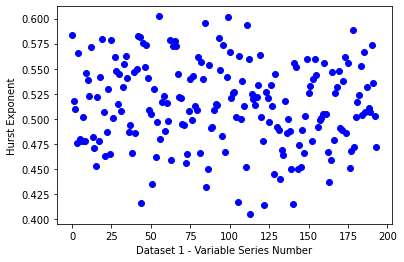

In [17]:
plt.plot(hc_1_list, 'bo')
plt.xlabel('Dataset 1 - Variable Series Number')
plt.ylabel('Hurst Exponent')
plt.show()

In [18]:
hc_2_list = []
for i in range(194):
  hc, _, _  = compute_Hc(df2[i], kind = 'change',simplified = True)
  hc_2_list.append(hc)
print(hc_2_list)

[0.46825434821055284, 0.6233249481011635, 0.5969545344064633, 0.5313100405583197, 0.6658970093569299, 0.5662280498941219, 0.5363677415648961, 0.6756580294916484, 0.6414780432277474, 0.600778505275314, 0.567934664762553, 0.4459973762864064, 0.5772490564988526, 0.5614987425430716, 0.46797454815029965, 0.5368158242113416, 0.5805853742815043, 0.6194461201759117, 0.5741530582306736, 0.48833183345628334, 0.5576174328853963, 0.4868038188461186, 0.5885766435550595, 0.5689168300509972, 0.5994351241082558, 0.6208139487454619, 0.5939733902486668, 0.5468893711954246, 0.6352999188020516, 0.5961968839327882, 0.5648127933921537, 0.634915818304424, 0.6170835437415744, 0.6553602436083661, 0.5868980812883161, 0.6166069188611267, 0.6817367868162784, 0.6006756742614049, 0.41680908055401605, 0.45472599149981013, 0.6630732120340617, 0.5054752047333679, 0.5318330923393905, 0.5725559318698052, 0.5323300903852318, 0.5077058642996458, 0.5146920069955117, 0.46344387607213106, 0.47033041455877894, 0.4712866655299

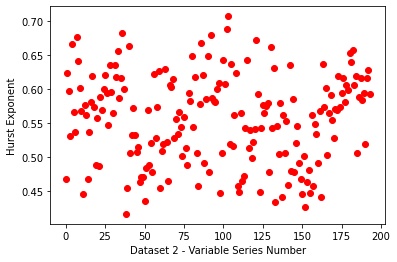

In [19]:
plt.plot(hc_2_list, 'ro')
plt.xlabel('Dataset 2 - Variable Series Number')
plt.ylabel('Hurst Exponent')
plt.show()

In [20]:
hc_3_list = []
for i in range(194):
  hc, _, _  = compute_Hc(df3[i], kind = 'change',simplified = True)
  hc_3_list.append(hc)
print(hc_3_list)

[0.5928936873420295, 0.6387741043908504, 0.480795061662162, 0.5973445525404146, 0.7620985147336806, 0.5652750258115933, 0.6393697571014727, 0.590404536196839, 0.5688336927901376, 0.5416641280667929, 0.6025756719403073, 0.6376544359587502, 0.592881662648575, 0.5955761264757188, 0.4890616407407823, 0.7254935295731488, 0.6191125291241226, 0.6401749290982247, 0.4921161435999954, 0.5280144386077762, 0.4964488990610023, 0.6070232989423051, 0.5379163383496967, 0.6256770786840065, 0.6388269708403633, 0.6643768030389855, 0.41044491521030546, 0.6328809378514235, 0.6276273844938135, 0.6145378523042012, 0.5228768477163601, 0.5485201503907235, 0.6229031682088035, 0.6903287354809394, 0.6146995949759867, 0.694223711404891, 0.6594217712461624, 0.5251710197650032, 0.6100388165549158, 0.51460693984875, 0.7143550845842641, 0.6074671483957444, 0.47070417580228524, 0.65822464946641, 0.47638716182541724, 0.5003613171015063, 0.5831346131364807, 0.5020428099418508, 0.5377015996149968, 0.6483836764752621, 0.51

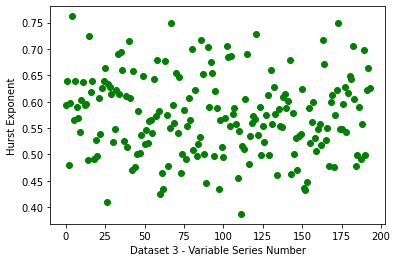

In [21]:
plt.plot(hc_3_list, 'go')
plt.xlabel('Dataset 3 - Variable Series Number')
plt.ylabel('Hurst Exponent')
plt.show()

#Pearson Correlation Matrix

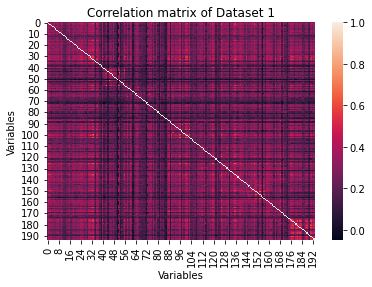

In [101]:
sns.heatmap(df1.corr())
plt.title("Correlation matrix of Dataset 1")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

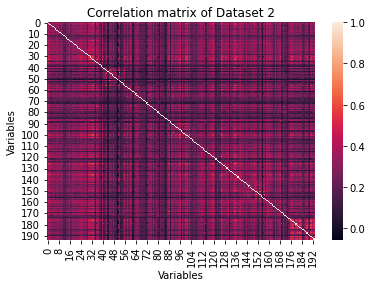

In [99]:
sns.heatmap(df2.corr())
plt.title("Correlation matrix of Dataset 2")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

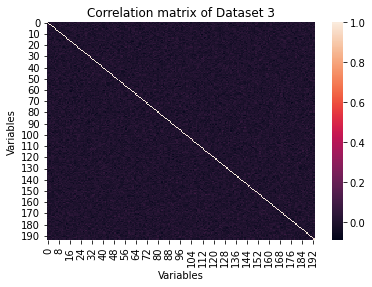

In [100]:
sns.heatmap(df3.corr())
plt.title("Correlation matrix of Dataset 3")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

#Distribution of Eigen Values of Pearson Correlation Matrix

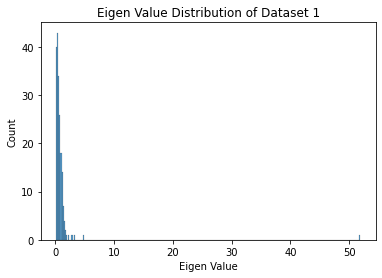

In [104]:
sns.histplot(np.linalg.eig(df1.corr())[0])
plt.title("Eigen Value Distribution of Dataset 1")
plt.xlabel("Eigen Value")
#plt.ylabel("Count")
plt.show()

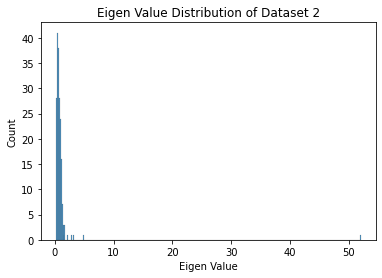

In [105]:
sns.histplot(np.linalg.eig(df2.corr())[0])
plt.title("Eigen Value Distribution of Dataset 2")
plt.xlabel("Eigen Value")
#plt.ylabel("Count")
plt.show()

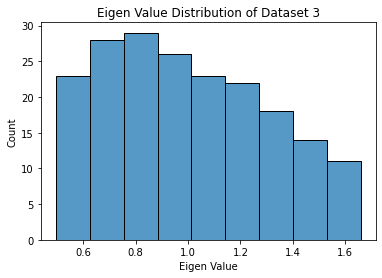

In [106]:
sns.histplot(np.linalg.eig(df3.corr())[0])
plt.title("Eigen Value Distribution of Dataset 3")
plt.xlabel("Eigen Value")
#plt.ylabel("Count")
plt.show()